In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Data/update_df.csv')
data.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,...,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,...,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,...,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,...,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,...,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


### 01-Check the amount of different property types

In [5]:
prop_type_count = data['prop_type'].value_counts().rename_axis('prop_type').reset_index(name='count')
prop_type_count

,prop_type,count
0,condo,7078
1,land,1182
2,multi_family,720
3,single_family,582


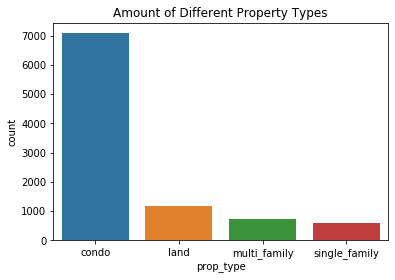

In [6]:
prop_type_plot = sns.barplot(x='prop_type', y='count', data=prop_type_count)
plt.title('Amount of Different Property Types')
plt.show()

### 02-Median Listing Price by Property Type

In [55]:
price_median_by_prop_type = data.groupby('prop_type')['price'].median().rename_axis('prop_type').reset_index(name='median_price').sort_values('median_price', ascending=False)
price_median_by_prop_type.reset_index().drop(['index'], axis=1)

,prop_type,median_price
0,single_family,379950.0
1,multi_family,339900.0
2,condo,275000.0
3,land,59999.5


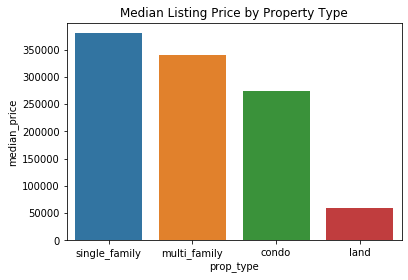

In [52]:
prop_type_plot = sns.barplot(x='prop_type', y='median_price', data=price_median_by_prop_type,
                             order=price_median_by_prop_type.sort_values('median_price', ascending=False)['prop_type'])
plt.title('Median Listing Price by Property Type')
plt.show()

### 03-Median Listing Price by Postal Code

In [57]:
price_median_by_postal_code = data.groupby('postal_code')['price'].median().rename_axis('postal_code').reset_index(name='median_price').sort_values('median_price', ascending=False)
price_median_by_postal_code.reset_index().drop(['index'], axis=1).head()

,postal_code,median_price
0,19118,860000.0
1,19102,670000.0
2,19103,599900.0
3,19106,575000.0
4,19147,525000.0


In [59]:
price_median_by_postal_code.reset_index().drop(['index'], axis=1).tail()

,postal_code,median_price
41,19139,127450.0
42,19142,115000.0
43,19140,80000.0
44,19133,52500.0
45,19132,50000.0


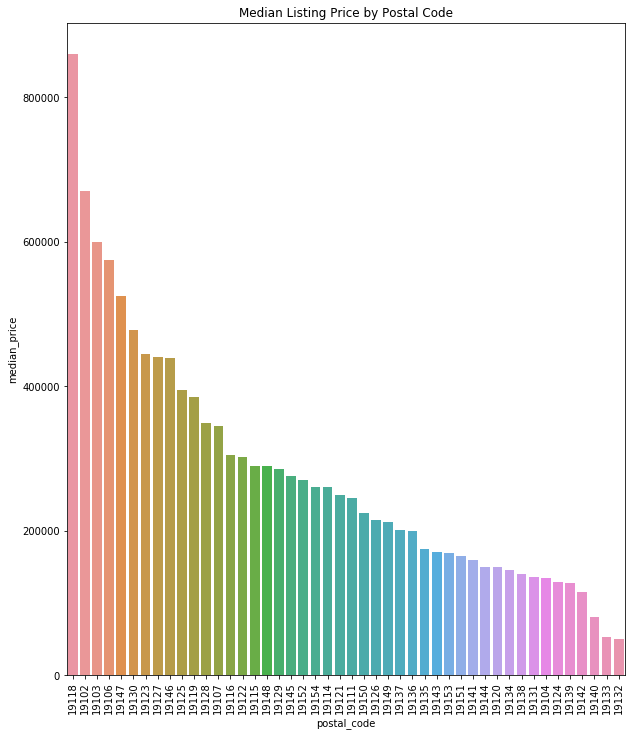

In [50]:
fig, ax = plt.subplots(figsize=(10,12))
prop_type_plot = sns.barplot(x='postal_code', y='median_price', ax=ax, data=price_median_by_postal,
                             order=price_median_by_postal.sort_values('median_price', ascending=False)['postal_code'])
prop_type_plot.set_xticklabels(price_median_by_postal['postal_code'],rotation=90)
plt.title('Median Listing Price by Postal Code')
plt.show()

### 04-Histogram for Listing Prices Under $1,000,000

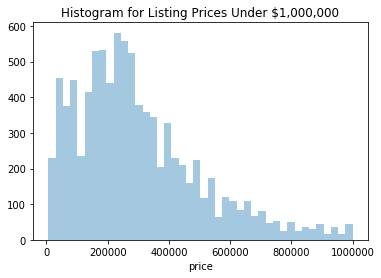

In [16]:
under_1mil = data[data['price'] < 1000000]
plt.title("Histogram for Listing Prices Under $1,000,000")
sns.distplot(under_1mil['price'], kde=False)
plt.show()